# Reproducing figures for the manuscript

Gkanias, E., McCurdy, L. Y., Nitabach, M. N., & Webb, B. (2021). The incentive circuit:
memory dynamics in the mushroom body of *Drosophila melanogaster*. Submitted to eLife.

In [1]:
import warnings
import os

# the directory of the file
__dir__ = os.path.dirname(os.path.abspath(""))

warnings.filterwarnings('ignore')

%cd -q ../examples

## The Incentive Circuit (IC)

sd Correlation: R=0.1006, p=3.4019e-01
rc Correlation: R=0.1878, p=7.3068e-02
mf Correlation: R=0.1435, p=1.7232e-01
srdc Correlation: R=0.2334, p=2.5167e-02
smdf Correlation: R=0.1513, p=1.4999e-01
rmcf Correlation: R=0.1072, p=3.0929e-01
srmdcf Correlation: R=0.1162, p=2.6994e-01
Plausible model Correlation: R=0.7579, p=2.2007e-18
Best model Correlation: R=0.7734, p=1.6516e-19


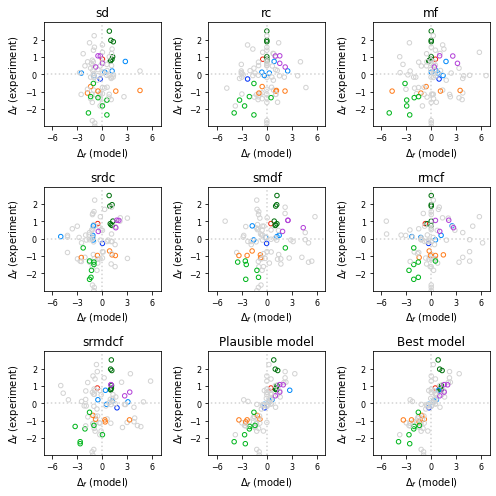

In [2]:
import run_bennett_2021

run_bennett_2021.main()

**Figure 3 - Figure supplement 1.** Testing the performance of the incentive circuit in the experiments of
[Bennett et al. (2021)](https://doi.org/10.1038/s41467-021-22592-4) - Figure 5.
Bennett et al. (2021) collected behavioural data ($\Delta f$ measure) from 92 experiments, summarised
[here](../src/incentive/data/bennett2021/41467_2021_22592_MOESM4_ESM.xlsx), and calculate their correlation to the
behaviour produced by their model.
The behavioural data involve intervention (e.g., activation or silencing) in different MBONs or DANs, which are grouped
by colour codes. Here we use the same colour codes as in the original paper for convenience.
For the details of this analysis please refer to their original work.
We test the behaviour of the incentive circuit when using two different learning rules: (A) the DPR and (B) the RPE.
As we do not know what type the intervened MBON or DAN is, we test for all the types (and groups of them) and we report
the ones with the highest correlation under the "Best fit" plot.
We also try to guess the type by the identity of the neuron (or group of neurons) intervened and we report the
correlation coefficient under the "Selected neuron types" plot.
The types selected for each experiment can also be found
[here](../src/incentive/data/bennett2021/41467_2021_22592_MOESM4_ESM.xlsx).

### Modelling the responses

In order to produce the responses and compare them to the actual responses of the neurons, we first summarise the
real responses and then we reconstruct them using the scripts below:

#neurons: 43
#flies: 357
min #flies/neuron: 2
max #flies/neuron: 14
mean #flies/neuron: 8.30232558139535


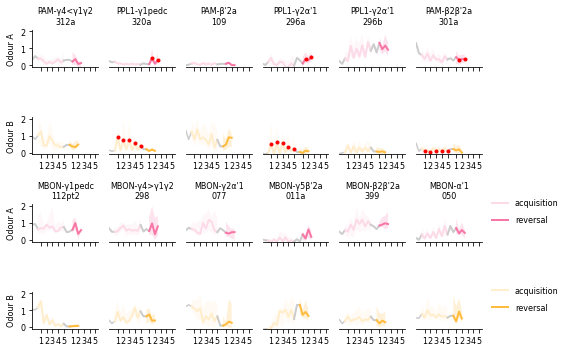

In [2]:
import plot_data

plot_data.main("--stats", "--only-nids")

**Figure 5 to 8 - data.** The responses from the recorded neurons in the *Drosophila melanogaster*
mushroom body (relative to the incentive circuit) during the experiment described in **Figure 4** (see text).
In each row we present the driver of the recorded neurons, the median responses of the neuron for each odour (coloured
as pink for odour A or yellow for odour B) over a number of flies, and the 25% and 75% quantiles marked by the coloured
region. By changing the parameters we can plot all the data shown in **Figure 4 - Figure supplement 1**.

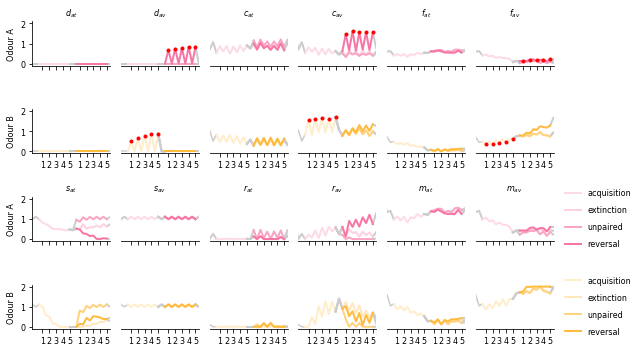

In [3]:
import plot_model

plot_model.main("--only-nids", "--values")

**Figure 5 to 8 - model.** The responses reconstructed by the model (first 4 rows) and the respective synaptic weights
(last 6 rows). Note that rows 5-8 are for DANs, where all the synaptic weights from the KCs are zero (not connected).
The last 3 rows show the KC-MBON synaptic weights for the different MBONs, where the first (pink) row shows the weights
that correspond to odour A, the second (yellow) row shows the synaptic weights relative to odour B, and the last
(orange) row to the ones that are related to both odours. In this example we crease the responses and weights for the
main figures (using the whole circuit). However, by changing the parameters we can create the responses shown in all the
figures and figure supplements.


### Modelling the behaviour

By running the script below we generate the paths of 100 simulated flies for the behavioural experiment of our article,
and with 1 Hz frequency (1 sample per second = 100 samples per 100 seconds). We run the same experiment for 10
consecutive repeats (updating the same parameters) and we store these data in the given directory. Then we create the
fish-bone plots for the responses and the weights of flies that visited both odours at least once (for one second).

In [ ]:
import create_arena_paths

create_arena_paths.main("--nb-flies", "100", "--nb-time-steps", "100", "-R", "10", "--dir", "../src/incentive/data/arena/")

41 / 100
49 / 100
23 / 100
82 / 100
76 / 100
90 / 100


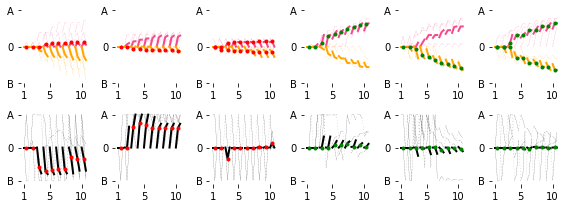

In [4]:
import plot_arena_fishbone

plot_arena_fishbone.main("-R", "10", "-V", "A and B", "--dir", "../src/incentive/data/arena/")

**Figure 11.** Behavioural summary of a subsets of simulated flies, that visited both odours at any time during the 10
repeats. Columns show the different conditions and the population that was recorded visiting both odours. Top row:
the normalised cumulative time spend exposed in odour A (pink lines) or odour B (yellow lines - note this line is
reversed). For each repeat we present 3 values (average over all the pre-training, training and post-training time-steps
respectively) where the values associated with the training phase are marked with red or green dots when punishment or
reward has been delivered to that odour respectively. Thin lines show 3 representative samples of individual flies.
Thick lines show the median over the simulated flies that visited both odours. Bottom row: the preference index (PI) to
each odour extracted by the above cumulative times.

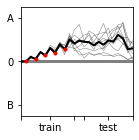

In [5]:
import run_unpaired_a

run_unpaired_a.main()


**Figure 12.** The preference index (PI) of the agent during the classic unpaired conditioning paradigm. During the
training phase, we deliver electric shock or odour A alternately. During the test phase, we deliver odour A and odour B
alternately. The preference index (PI) is calculated by using the MBON responses for each odour.

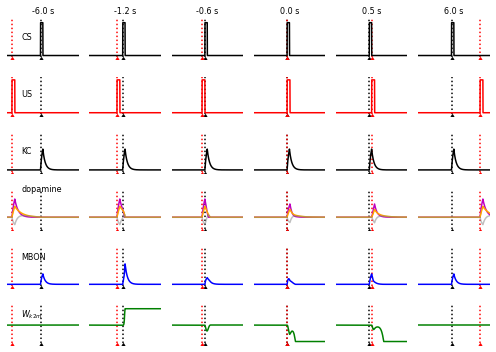

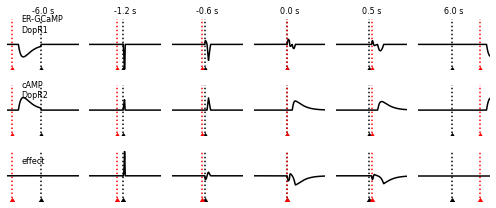

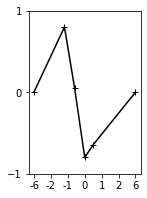

In [6]:
import run_handler_2019

run_handler_2019.main()

The effect of the ER-Ca$^{2+}$ and cAMP based on the order of the conditional (CS) and unconditional stimuli (US).
(A) Normalised mean change of the synaptic weight plotted as a function of the $\Delta s$ (US start - CS start),
similar to [Handler et al. (2019)](https://doi.org/10.1016/j.cell.2019.05.040) - Figure 2E.
(B) Detailed ER-Ca$^{2+}$ and cAMP responses reproduced for the different $\Delta s$, and their result
synaptic-weight change. Black arrowhead marks time of the CS (duration 0.5 sec); red arrowhead marks time of the
US (duration 0.6 sec), similar to [Handler et al. (2019)](https://doi.org/10.1016/j.cell.2019.05.040) - Figure 2D.

In order to reproduce all the figures from the manuscript you should use the scripts
in the [examples](../examples) directory.

**Author:** [Evripidis Gkanias](https://evgkanias.github.io/).

Copyright &copy; 2021, Insect Robotics Group, Institute of Perception Action and Behaviour,
School of Informatics, the University of Edinburgh.
